# Bragg edges with G4LumaCam using ncrystal integration
Tsviki Y. Hirsh


Dec 9th 2025

In [1]:
import lumacam

In [2]:
sim = lumacam.Simulate("archive/ncrystal")
config = lumacam.Config.neutrons_bragg_edge()
config.num_events = 10000
config.scintillator = "ZnS"

In [3]:
fe = sim.run(config)

Simulating:   0%|          | 0/10000 [00:00<?, ?events/s]

In [4]:
sim = lumacam.Simulate("archive/ncrystal_openbeam")
config = lumacam.Config.neutrons_bragg_edge()
config.num_events = 10000
config.sample_material = "G4Galactic"
config.scintillator = "ZnS"
config.scintillator_thickness = 0.075
config

Configuration:
  Particle: neutron
  Energy: uniform distribution from 0.00128 to 0.327 eV
  (gradient: 0.0, intercept: 1.0)
  Neutron Flux: 1000000.0 n/cm²/s
  Pulse Frequency: 0.02 kHz
  Position: (0, 0, -900) cm
  Direction: (0, 0, 1)
  Shape: Rectangle (60x60 mm)
  Angle: iso (max theta: 0 deg)
  Sample Material: G4Galactic
  Sample Thickness: 2.0 cm
  Scintillator: ZnS
  Scintillator Thickness: 0.075 cm
  CSV Batch Size: 5000
  Progress Interval: 100
  Events: 10000
  Output: sim_data.csv

In [5]:
ob = sim.run(config)

Simulating:   0%|          | 0/10000 [00:00<?, ?events/s]

In [6]:
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


<Axes: ylabel='Frequency'>

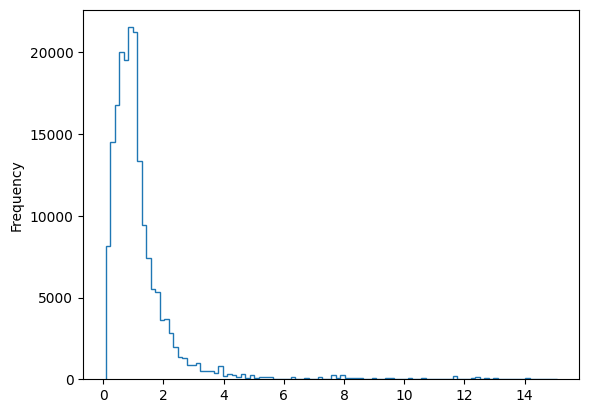

In [9]:

((fe["toa"] - fe["pulse_time_ns"])/(ob["toa"] - ob["pulse_time_ns"])).dropna().plot.hist(bins=100,histtype="step",logy=False,ax=gca())

KeyError: 'neutron_energy'

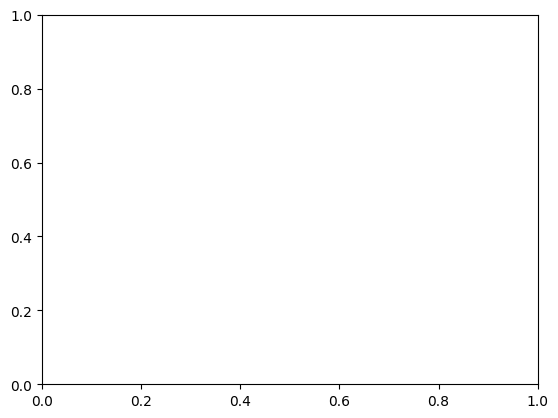

In [14]:
fe.plot.scatter(x="neutron_energy",y="toa")